# This notebook shows you where the filtered velocities are on gyre for the Agulhas region of llc4320

I have only done filtering for about 45hrs of velocities so far, so there is not much data. 

In [1]:
#First let's import some packages
import xarray as xr
import numpy as np
from xgcm.grid import Grid

The unfiltered velocities at u and v points in the MITgcm grid. NB: they have been interpolated to these points from tracer points.

In [2]:
unfiltered_vels = xr.open_zarr('/swot/SUM03/spencer/agulhas_vels/unfiltered_vels.zarr')
unfiltered_vels

,Array,Chunk
Bytes,1.83 GB,259.20 kB
Shape,"(49, 2160, 2160)","(1, 180, 180)"
Count,7057 Tasks,7056 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.83 GB,259.20 kB
Shape,"(49, 2160, 2160)","(1, 180, 180)"
Count,7057 Tasks,7056 Chunks
Type,float64,numpy.ndarray


Next, here are the velocities that are filtered using the method applied by Shakespeare and Hogg 2017. The filtering is performed using a convoltion filterwith a width of 20hrs. Again, the velocities are interpolated onto u and v points. 

In [3]:
filtered_vels = xr.open_zarr('/swot/SUM03/spencer/agulhas_vels/filtered_vels.zarr')
filtered_vels

,Array,Chunk
Bytes,1.83 GB,259.20 kB
Shape,"(49, 2160, 2160)","(1, 180, 180)"
Count,7057 Tasks,7056 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.83 GB,259.20 kB
Shape,"(49, 2160, 2160)","(1, 180, 180)"
Count,7057 Tasks,7056 Chunks
Type,float64,numpy.ndarray


The eulerian filtered velocities are filtered using the same convolution filter, but applied at each point in space, rather than on each particle trajectory. They are also ion u and v points. 

In [4]:
eul_filtered_vels = xr.open_zarr('/swot/SUM03/spencer/agulhas_vels/eul_filtered_vels.zarr')
eul_filtered_vels

<xarray.Dataset>
Dimensions:  (i: 2160, i_g: 2160, j: 2160, j_g: 2160, time: 49)
Coordinates: (12/15)
    drF      float32 ...
    dxG      (j_g, i) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    face     int64 ...
    hFacC    (j, i) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    ...       ...
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
  * j_g      (j_g) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
    k        int64 ...
    raC      (j, i) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
  * time     (time) int64 0 3600 7200 10800 ... 162000 165600 169200 172800
Data variables:
    u        (time, j, i_g) float64 dask.array<chunksize=(49, 180, 180), meta=np.ndarray>
    v        (time, j_g, i) float64 dask.array<chunksize=(49, 180, 180), meta=np.ndarray>

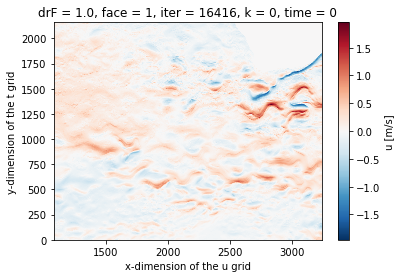

In [5]:
eul_filtered_vels.u.sel(time=0).plot()

Grid information is stored on the Eulerian filtered velocities, but is applicable to all the velocities in this notebook. So to calculate the divergence of the unfiltered velocities for example:

In [6]:
ds = eul_filtered_vels
grid = Grid(ds,coords={'X': {'center': 'i', 'left': 'i_g'},'Y': {'center': 'j', 'left': 'j_g'}})

In [7]:
unf_utransport = unfiltered_vels.u*ds.dyG*ds.hFacW*ds.drF
unf_vtransport = unfiltered_vels.v*ds.dxG*ds.hFacS*ds.drF

In [8]:
div_unf = (grid.diff(unf_utransport, 'X') + grid.diff(unf_vtransport, 'Y')) / ds.raC

In [9]:
div_unf

<xarray.DataArray (time: 49, i: 2160, j: 2160)>
dask.array<truediv, shape=(49, 2160, 2160), dtype=float64, chunksize=(1, 179, 179), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 3600 7200 10800 ... 162000 165600 169200 172800
  * i        (i) int64 1080 1081 1082 1083 1084 ... 3235 3236 3237 3238 3239
  * j        (j) float64 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
    drF      float32 ...
    face     int64 ...
    hFacC    (j, i) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>
    k        int64 ...
    raC      (j, i) float32 dask.array<chunksize=(180, 180), meta=np.ndarray>